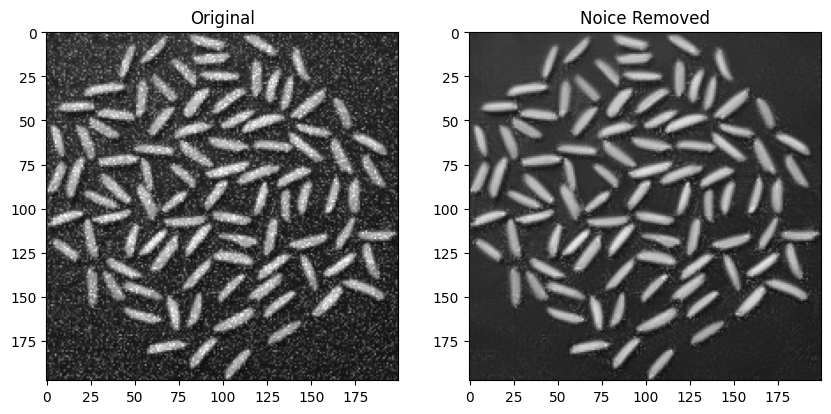

In [12]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

image = cv.imread("rice_gaussian_noise.png")

dst = cv.fastNlMeansDenoisingColored(image, None, 20, 20, 7, 15)

fig, ax = plt.subplots(1, 2, figsize=(10, 20))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(dst, cmap="gray")
ax[1].set_title("Noice Removed")
plt.show()


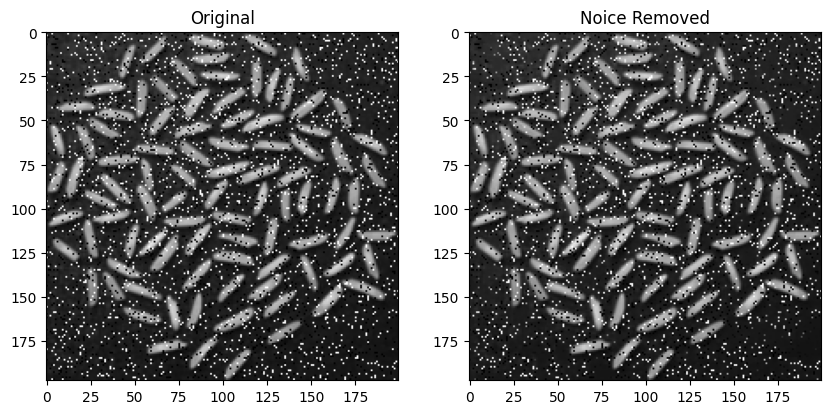

In [22]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

image = cv.imread("rice_salt_pepper_noise.png")

dst = cv.fastNlMeansDenoisingColored(image, None, 20, 20, 7, 15)

fig, ax = plt.subplots(1, 2, figsize=(10, 20))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(dst, cmap="gray")
ax[1].set_title("Noice Removed")
plt.show()


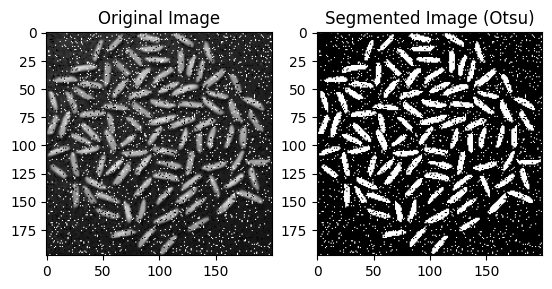

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt

# Read the grayscale image
image = cv.imread("rice_salt_pepper_noise.png", cv.IMREAD_GRAYSCALE)

# Apply Otsu's thresholding
_, binary_image = cv.threshold(image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Display the original and segmented images
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(binary_image, cmap='gray'), plt.title('Segmented Image (Otsu)')
plt.show()


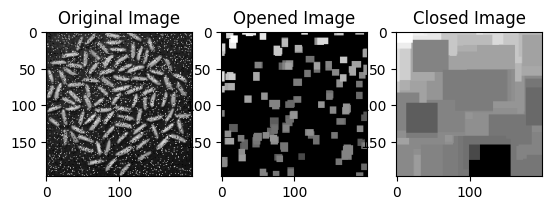

In [10]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Read the binary image
image = cv.imread("rice_salt_pepper_noise.png", cv.IMREAD_GRAYSCALE)

# Apply morphological operations to remove small objects (opening)
kernel_open = np.ones((5, 5), np.uint8)
image_opened = cv.morphologyEx(image, cv.MORPH_OPEN, kernel_open, iterations=2)

# Apply morphological operations to fill holes (closing)
kernel_close = np.ones((5, 5), np.uint8)
image_closed = cv.morphologyEx(image_opened, cv.MORPH_CLOSE, kernel_close, iterations=10)

# Display the original, opened, and closed images
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(image_opened, cmap='gray'), plt.title('Opened Image')
plt.subplot(133), plt.imshow(image_closed, cmap='gray'), plt.title('Closed Image')
plt.show()


In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('rice_gaussian_noise.png', cv.IMREAD_GRAYSCALE)

denoised_im = cv.fastNlMeansDenoising(im, None, h=28, searchWindowSize=10)

_, segmented_image = cv.threshold(denoised_im, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

closed_image = cv.morphologyEx(segmented_image, cv.MORPH_CLOSE, kernel)

opened_image = cv.morphologyEx(closed_image, cv.MORPH_OPEN, kernel)

num_labels, labels = cv.connectedComponents(opened_image)

num_rice_grains = num_labels - 1

print("Number of rice grains:", num_rice_grains)


Number of rice grains: 68
